0. iteration: 
a =
[0.21694126 0.18387687 0.1567011 ]
b =
[2.134 0.1   0.91  1.522 1.198 0.1   0.1   0.1   2.278 0.442 1.612 1.306
 1.882 1.846 1.666 1.486 1.9   2.458 2.764 2.314]
1. iteration: 
a =
[0.28280448 0.19584081 0.15820875]
b =
[2.21790106 0.1        1.15189695 1.7093572  1.35812121 0.1
 0.1        0.1        2.39194195 0.77336923 1.612      1.45400085
 1.882      1.84862025 1.666      1.486      1.9        2.458
 2.764      2.314     ]
2. iteration: 
a =
[0.34670392 0.20128878 0.16610565]
b =
[2.43363089 0.1        1.17384105 1.81803827 1.44418153 0.1
 0.13597737 0.1        2.61027779 0.77336923 1.612      1.45400085
 1.882      1.91970248 1.666      1.486      1.9        2.458
 2.764      2.314     ]
3. iteration: 
a =
[0.39847262 0.20545699 0.17097599]
b =
[2.50539164 0.1        1.3154333  1.93063545 1.55854631 0.1
 0.18889198 0.1        2.68559477 0.83310446 1.612      1.45400085
 1.882      1.91970248 1.66663629 1.486      1.9        2.47525231
 2.764      2.314     ]
4

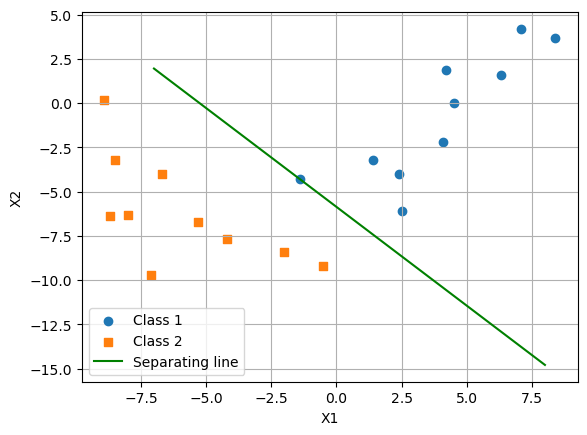

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class_1_samples = [
    (7.1, 4.2), 
    (-1.4, -4.3), 
    (4.5, 0.0), 
    (6.3, 1.6), 
    (4.2, 1.9), 
    (1.4, -3.2), 
    (2.4, -4.0), 
    (2.5, -6.1),
    (8.4, 3.7),
    (4.1, -2.2)
]
class_2_samples = [
    (-2.0, -8.4), 
    (-8.9, 0.2),
    (-4.2, -7.7),
    (-8.5, -3.2),
    (-6.7, -4.0),
    (-0.5, -9.2),
    (-5.3, -6.7),
    (-8.7, -6.4),
    (-7.1, -9.7),
    (-8.0, -6.3)
]

labeled_class_1_samples = [(1,) + sample for sample in class_1_samples]
labeled_class_2_samples = [(-1,) + (-sample[0], -sample[1]) for sample in class_2_samples]
combined_samples = labeled_class_1_samples + labeled_class_2_samples

# convert to numpy array
Y = np.array(combined_samples)

# initialize parameter
a = np.full((3,), 0.1)
b = np.full((len(combined_samples),), 0.1)  # b for every # of sample
learning_rate = 0.9 
epochs = 200 

# check convergence
def has_converged(Ya, threshold=0.01):
    return np.all(Ya > 0) and np.min(Ya) < threshold

# plot
def plot_samples_and_hyperplane(Y, a, class_1_samples, class_2_samples):
    plt.scatter(*zip(*class_1_samples), marker='o', label='Class 1')
    plt.scatter(*zip(*class_2_samples), marker='s', label='Class 2')
    
    # x range for plotting the line
    x_range = np.linspace(-7, 8, 100)
    # y from the line equation
    y_range = -(a[1]/a[2])*x_range - (a[0]/a[2])
    
    # for drawing
    plt.plot(x_range, y_range, 'g-', label='Separating line')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

# ho-kashyap 
for i in range(epochs):
    
    e = np.dot(Y, a) - b
    Ya = np.dot(Y, a)
    
    if has_converged(Ya):
        print(f"converged at iteration {i}")
        break
    
    b = b + learning_rate * (e + np.abs(e))
    result = Y.T @ Y
    
    try:
        inverse_result = np.linalg.inv(result)
        a = (inverse_result @ Y.T) @ b
        
    # spesific error module for library
    except np.linalg.LinAlgError:
        print("matrix is singular")
        break
    
    print(f"{i}. iteration: \na =\n{a}\nb =\n{b}")

print("final a:", a)
print("final b:", b)

plot_samples_and_hyperplane(Y, a, class_1_samples, class_2_samples)
